# Voting Classifiers

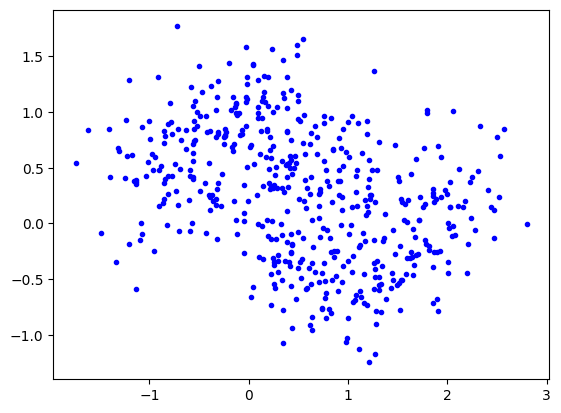

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.plot(X[:, 0], X[:, 1], 'b.')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


## Using soft voting
Soft voting gives more weight to highly confident votes, hence often achieves higher performance than hard voting.

In [12]:
svm_clf = SVC(probability=True)
soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
soft_voting_clf.fit(X_train, y_train)
y_pred = soft_voting_clf.predict(X_test)
print('SoftVotingClassifier', accuracy_score(y_test, y_pred))

SoftVotingClassifier 0.912


# Bagging and Pasting
Another approach of ensemble is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. 

Bagging is when sampling is performed with replacement (same training instances are allowed to appear in different predictor). Pasting is when sampling is performed without replacement.

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging: bootstrap=True
# Pasting: bootstrap=False
# n_jobs=-1 tells Scikit-Learn to use all available cores
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [16]:
y_pred = bag_clf.predict(X_test)
print('BaggingClassifier', accuracy_score(y_test, y_pred))

BaggingClassifier 0.92


## Out-of-Bag Evaluation
out-of-bag instances: average of 37% of the training instances that are not sampled for a predictor. They can be used for evaluation.

In [17]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [18]:
bag_clf.oob_score_

0.9226666666666666

In [19]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.928

# Random Forest
An Random Forest is an ensamble of Decision Trees, generally trained via bagging.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [21]:
y_pred_rf = rnd_clf.predict(X_test)

## Feature Importance
Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average.

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [25]:
for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09154849894621339
sepal width (cm) 0.020196030979318172
petal length (cm) 0.435799775778478
petal width (cm) 0.45245569429599036
